In [ ]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from matplotlib.gridspec import GridSpec
import seaborn as sns

# import data_clean_utils
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
import warnings


warnings.filterwarnings("ignore")

# import sys
# import importlib
# sys.path.append("../files_")
# import data_clean_script

# importlib.reload(data_clean_script)     # reload

In [228]:
from sklearn import set_config

set_config(transform_output="pandas")

# Import


In [229]:
original_df = pd.read_csv("../files_/train.csv")

In [230]:
import sys
import importlib

sys.path.append("../files_")
import data_clean_script

importlib.reload(data_clean_script)

<module 'data_clean_script' from '/Users/rabinpoudel/Documents/Code_code_Code/Anaconda/delivery_time_pred/notebooks/../files_/data_clean_script.py'>

In [231]:
df = data_clean_script.perform_data_cleaning(original_df)

In [232]:
original_df.shape, df.shape

((45593, 20), (45502, 19))

In [233]:
df.sample(10)

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
23730,24.0,5.0,sandstorms,medium,1,snack,scooter,0.0,no,urban,22,PUNE,3,thursday,0,15.0,evening,7.661250,medium
27040,38.0,4.6,sandstorms,low,0,meal,motorcycle,1.0,no,metropolitian,29,CHEN,3,sunday,1,5.0,night,12.417551,long
1337,37.0,4.6,windy,medium,0,snack,motorcycle,1.0,no,metropolitian,30,COIMB,3,wednesday,0,15.0,evening,7.790177,medium
32764,25.0,4.9,cloudy,high,0,drinks,motorcycle,1.0,no,urban,23,SUR,3,sunday,1,15.0,afternoon,6.081441,medium
38992,36.0,4.0,windy,medium,0,buffet,motorcycle,1.0,no,metropolitian,49,PUNE,3,friday,0,10.0,evening,12.256321,long
35813,21.0,4.1,fog,medium,1,snack,scooter,1.0,no,metropolitian,36,COIMB,3,friday,0,15.0,afternoon,10.906042,long
42235,28.0,4.7,windy,jam,0,buffet,motorcycle,0.0,no,metropolitian,29,SUR,3,monday,0,15.0,night,7.600984,medium
37763,25.0,4.8,fog,jam,1,meal,motorcycle,1.0,no,metropolitian,21,JAP,4,sunday,1,5.0,evening,7.448086,medium
702,30.0,4.8,sandstorms,low,2,drinks,electric_scooter,1.0,no,metropolitian,28,KOL,2,thursday,0,5.0,morning,1.513583,short
10849,20.0,4.8,sunny,medium,2,meal,motorcycle,0.0,no,urban,12,MUM,4,saturday,1,5.0,afternoon,10.708221,long


In [234]:
df.isna().sum()

age                    1854
ratings                1908
weather                 525
traffic                 510
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     993
festival                228
city_type              1198
time_taken                0
city_name                 0
order_month               0
order_day_of_week         0
is_weekend                0
pickup_time_minutes    1640
order_time_of_day      2070
distance               3630
distance_type          3630
dtype: int64

In [235]:
df.isna().sum().sum(), df.duplicated().sum()

(18186, 0)

<Axes: >

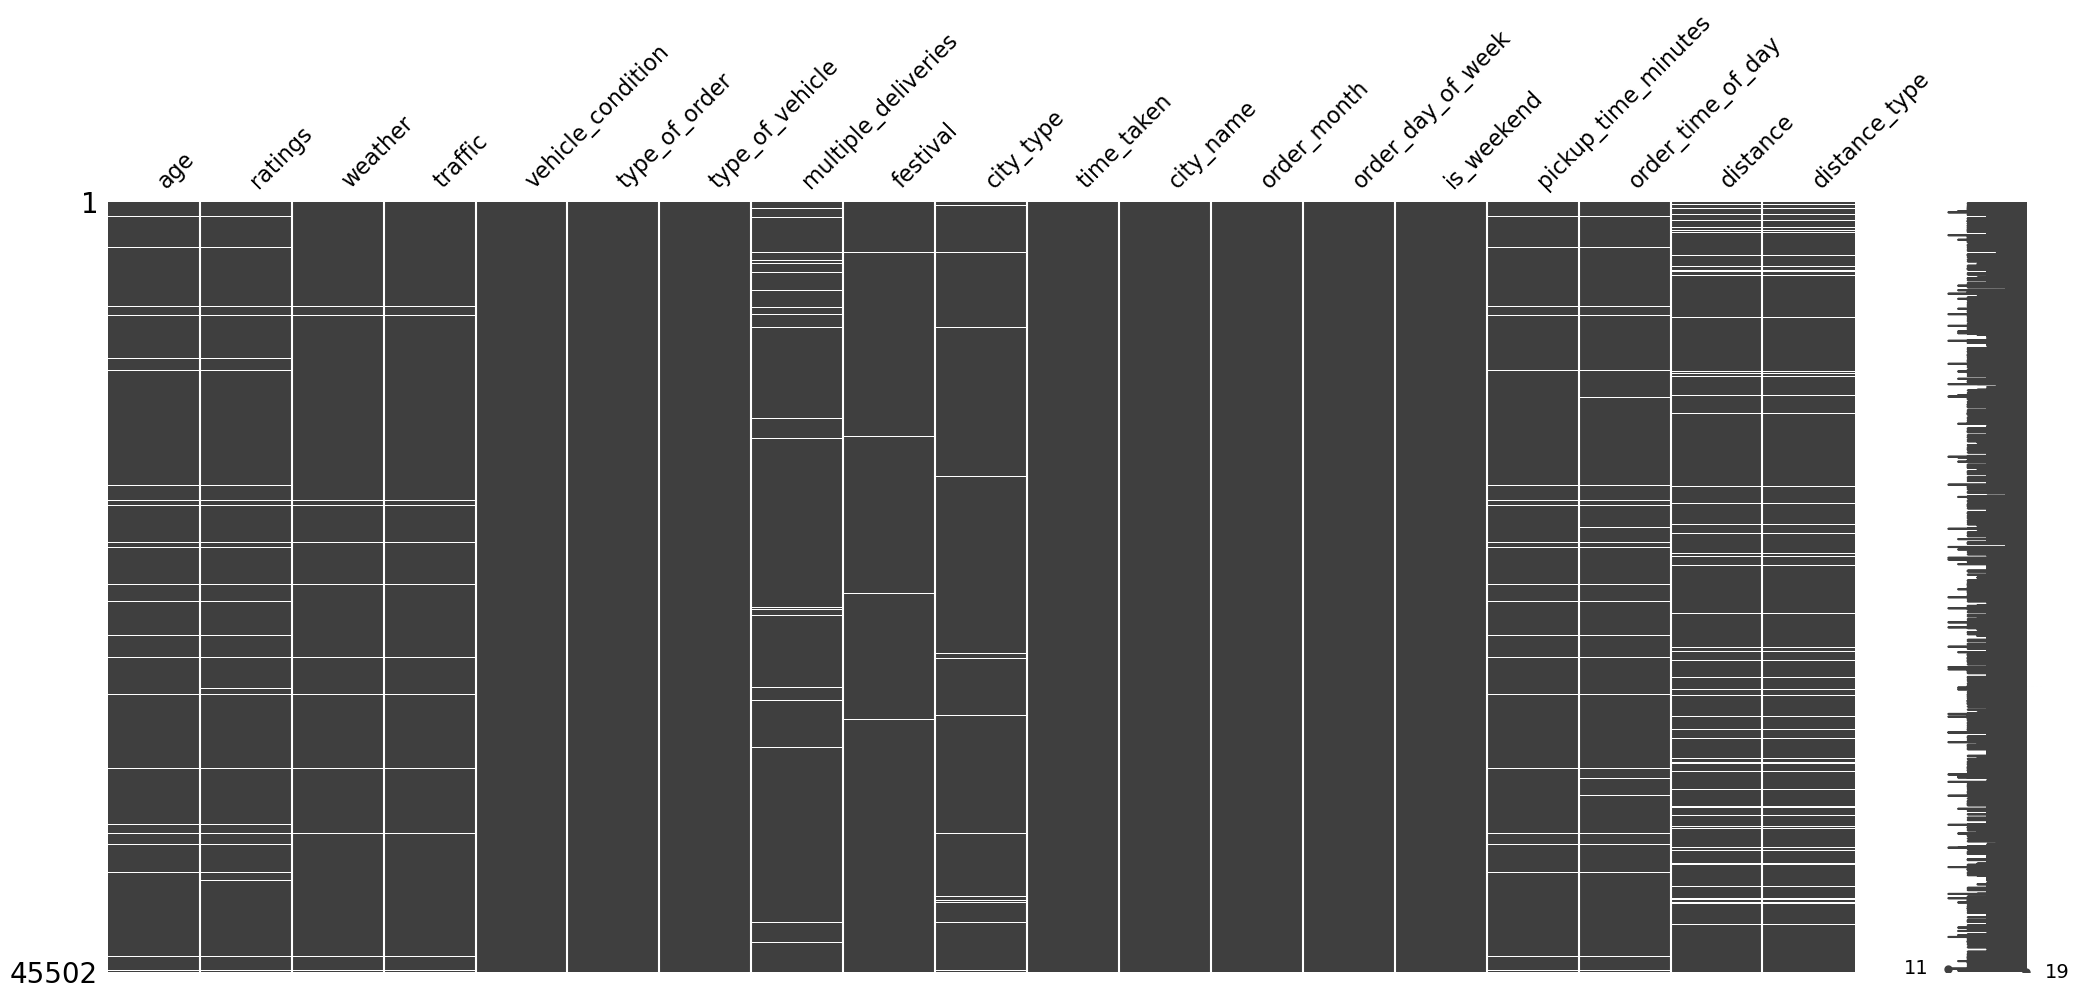

In [236]:
msno.matrix(df)

In [237]:
missing_cols = df.isna().any(axis=0).loc[lambda x: x].index
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

# Baseline model

- without imputation


In [238]:
temp_df = df.copy(deep=True).dropna()

In [239]:
temp_df.isna().sum()

age                    0
ratings                0
weather                0
traffic                0
vehicle_condition      0
type_of_order          0
type_of_vehicle        0
multiple_deliveries    0
festival               0
city_type              0
time_taken             0
city_name              0
order_month            0
order_day_of_week      0
is_weekend             0
pickup_time_minutes    0
order_time_of_day      0
distance               0
distance_type          0
dtype: int64

In [240]:
temp_df.shape

(37695, 19)

In [241]:
X = temp_df.drop(columns="time_taken", axis=1)
y = temp_df["time_taken"]
X.head()

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,city_name,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,INDO,3,saturday,1,15.0,morning,3.025149,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,BANG,3,friday,0,5.0,evening,20.183530,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,BANG,3,saturday,1,15.0,morning,1.552758,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,COIMB,4,tuesday,0,10.0,evening,7.790401,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,CHEN,3,saturday,1,15.0,afternoon,6.210138,medium


In [242]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
xtrain.shape, xtest.shape, ytest.shape, ytrain.shape

((30156, 18), (7539, 18), (7539,), (30156,))

In [243]:
temp_df.columns.tolist()

['age',
 'ratings',
 'weather',
 'traffic',
 'vehicle_condition',
 'type_of_order',
 'type_of_vehicle',
 'multiple_deliveries',
 'festival',
 'city_type',
 'time_taken',
 'city_name',
 'order_month',
 'order_day_of_week',
 'is_weekend',
 'pickup_time_minutes',
 'order_time_of_day',
 'distance',
 'distance_type']

In [ ]:
num_cols = ["age", "ratings", "pickup_time_minutes", "distance"]
# continuous | categorical | nominal

nominal_cat_cols = [
    "weather",
    "type_of_order",
    "type_of_vehicle",
    "festival",
    "city_type",
    "city_name",
    "order_month",
    "order_day_of_week",
    "order_time_of_day",
    "is_weekend",
]
ordinal_cat_cols = ["traffic", "distance_type"]

In [245]:
for col in ordinal_cat_cols:
    print(col, temp_df[col].unique())

traffic ['high' 'jam' 'low' 'medium']
distance_type ['short', 'very_long', 'medium', 'long']
Categories (4, object): ['short' < 'medium' < 'long' < 'very_long']


In [246]:
traffic_order = ["low", "medium", "high", "jam"]
distance_order = ["short", "medium", "long", "very_long"]

In [247]:
preprocessor = ColumnTransformer(
    transformers=[
        ("scale", MinMaxScaler(), num_cols),
        (
            "nominal_encode",
            OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False),
            nominal_cat_cols,
        ),
        (
            "ordinal_encode",
            OrdinalEncoder(categories=[traffic_order, distance_order]),
            ordinal_cat_cols,
        ),
    ],
    remainder="passthrough",
    n_jobs=3,
    verbose_feature_names_out=False,
)
preprocessor.set_output(transform="pandas")

ColumnTransformer(n_jobs=3, remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'city_name',
                                  'order_month', 'order_day_of_week',
                                  'order_time_of_day', 'is_weekend']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']]),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [248]:
xtrain_transform = preprocessor.fit_transform(xtrain)
xtest_transform = preprocessor.transform(xtest)

In [249]:
xtrain_transform.head()

,age,ratings,pickup_time_minutes,distance,weather_fog,weather_sandstorms,weather_stormy,weather_sunny,weather_windy,type_of_order_drinks,...,order_day_of_week_tuesday,order_day_of_week_wednesday,order_time_of_day_evening,order_time_of_day_morning,order_time_of_day_night,is_weekend_1,traffic,distance_type,vehicle_condition,multiple_deliveries
8720,0.473684,0.56,1.0,0.404165,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,3.0,1.0,0,2.0
25245,1.000000,0.76,0.0,0.154044,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,1.0
34118,0.473684,0.80,0.5,0.002461,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1,0.0
26036,1.000000,0.92,1.0,0.460411,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0,1.0
37194,0.526316,0.76,0.5,0.243676,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1,1.0


In [250]:
# yeo=johnson transfor in label
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

y_train_transformed = pt.fit_transform(ytrain.values.reshape(-1, 1))
y_test_transformed = pt.transform(ytest.values.reshape(-1, 1))

In [251]:
y_train_transformed

,x0
0,2.028672
1,0.554539
2,-2.024267
3,-0.173699
4,0.554539
...,...
30151,0.457580
30152,-0.173699
30153,-1.350937
30154,0.047111


In [252]:
pt.lambdas_

array([0.32446096])

# Model I -- baseline model


In [253]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(xtrain_transform, y_train_transformed)

LinearRegression()

In [254]:
transformed_res = lr.predict(xtest_transform)
print("mae_transformed_yoe :", mean_absolute_error(y_test_transformed, transformed_res))
lr1 = LinearRegression()
lr1.fit(xtrain_transform, ytrain)
original_pred = lr1.predict(xtest_transform)
print("original-ytest :", mean_absolute_error(ytest, original_pred))

mae_transformed_yoe : 0.5154786687507606
original-ytest : 4.684188706200984


In [255]:
transformed_res

array([[ 0.16426446],
       [ 0.48287179],
       [ 0.58686043],
       ...,
       [ 0.70188119],
       [ 0.07723214],
       [-0.66821693]])

In [256]:
y_pred_test_inverse = pt.inverse_transform(transformed_res.reshape(-1, 1))

In [257]:
y_pred_test_inverse

array([[27.10373511],
       [30.25878684],
       [31.3381296 ],
       ...,
       [32.56099252],
       [26.28093231],
       [19.88873853]])

### Train error and test error


In [ ]:
ytrain_pred = pt.inverse_transform(lr.predict(xtrain_transform).reshape(-1, 1))
ytest_pred = pt.inverse_transform(lr.predict(xtest_transform).reshape(-1, 1))
print("MAE: Train error: ", mean_absolute_error(ytrain, ytrain_pred))
print("MAE: Test error: ", mean_absolute_error(ytest, ytest_pred))

MAE: Train error:  4.7050241534221415
MAE: Test error:  4.689894700994873


In [259]:
print("r2: Train score: ", r2_score(ytrain, ytrain_pred))
print("r2: Test score: ", r2_score(ytest, ytest_pred))

r2: Train score:  0.6009446783414196
r2: Test score:  0.596774227957171


## Impute Missing value


In [260]:
temp_df = df.copy(deep=True)

In [261]:
X = temp_df.drop(columns="time_taken")
y = temp_df["time_taken"]

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [262]:
xtrain.shape, xtest.shape, xtrain.shape[0] + xtest.shape[0], temp_df.shape

((36401, 18), (9101, 18), 45502, (45502, 19))

In [263]:
xtrain.isna().sum().sum()

14565

In [264]:
xtest.isna().sum().sum()

3621

In [265]:
pt = PowerTransformer()

y_train_transformed = pt.fit_transform(ytrain.values.reshape(-1, 1))

y_test_transformed = pt.transform(ytest.values.reshape(-1, 1))

In [266]:
ytrain.values.reshape(-1, 1)

array([[19],
       [20],
       [29],
       ...,
       [33],
       [29],
       [30]])

In [267]:
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

In [268]:
xtrain.isna().any(axis=1).mean().round(2)

0.17

In [269]:
xtrain.isna().any(axis=1)

11047    False
15692    False
14499     True
29258    False
22554    False
         ...  
11303    False
44821    False
38234     True
860      False
15822    False
Length: 36401, dtype: bool

## Age


In [270]:
xtrain.age.describe()

count    34931.000000
mean        29.569551
std          5.752869
min         20.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         39.000000
Name: age, dtype: float64

In [271]:
xtrain.age.isna().sum()

1470

In [272]:
age_median = xtrain.age.median()
age_median

30.0

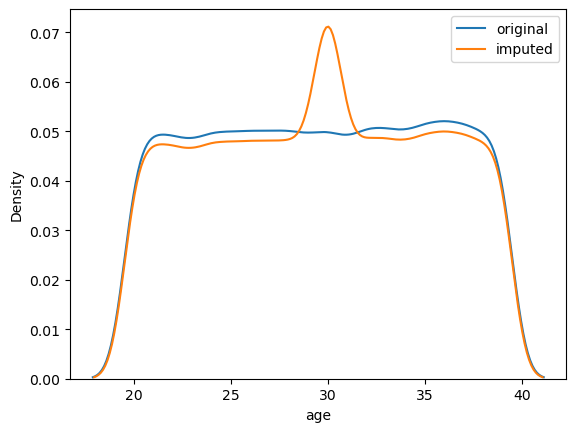

In [273]:
sns.kdeplot(xtrain["age"], label="original")
sns.kdeplot(xtrain["age"].fillna(age_median), label="imputed")
plt.legend()

distribution changed and peak appeared at age 30

- so advance method should be tried(knn imputer)


## Rating


In [274]:
xtrain["ratings"].describe()

count    34891.000000
mean         4.635058
std          0.314049
min          2.500000
25%          4.500000
50%          4.700000
75%          4.900000
max          5.000000
Name: ratings, dtype: float64

In [275]:
rating_median = xtrain["ratings"].median()
rating_median, xtrain.ratings.isna().sum()

(4.7, 1510)

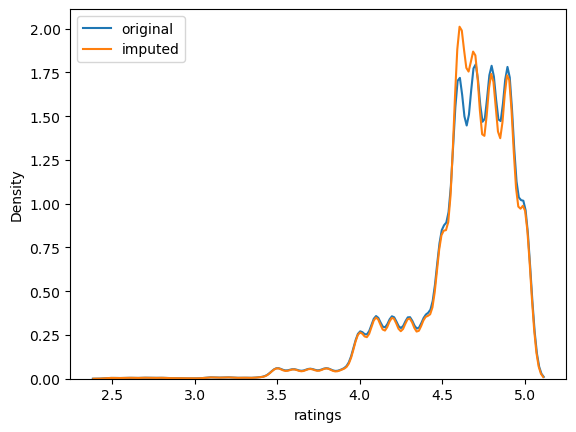

In [276]:
sns.kdeplot(xtrain["ratings"], label="original")
sns.kdeplot(xtrain["ratings"].fillna(xtrain.ratings.mean()), label="imputed")
plt.legend()

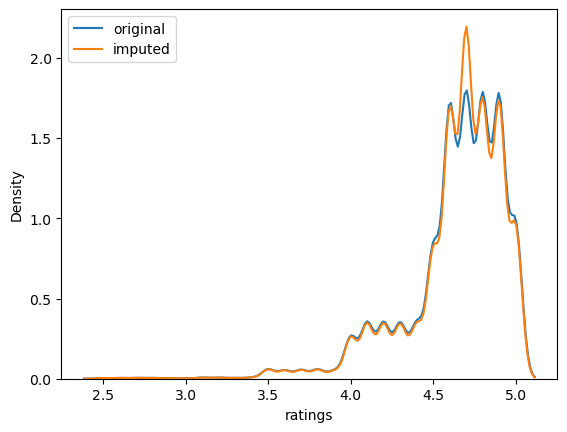

In [277]:
sns.kdeplot(xtrain["ratings"], label="original")
sns.kdeplot(xtrain["ratings"].fillna(rating_median), label="imputed")
plt.legend()

medain imputation is good


## Weather


In [278]:
xtrain.weather.value_counts(dropna=False)

weather
fog           6160
stormy        6051
cloudy        6033
sandstorms    5958
windy         5928
sunny         5850
NaN            421
Name: count, dtype: int64

all categories are uniform ,

if (421)nan are imputed with mode fog will dominate and current uniform distribution will change to fog dominated


<Axes: xlabel='count', ylabel='weather'>

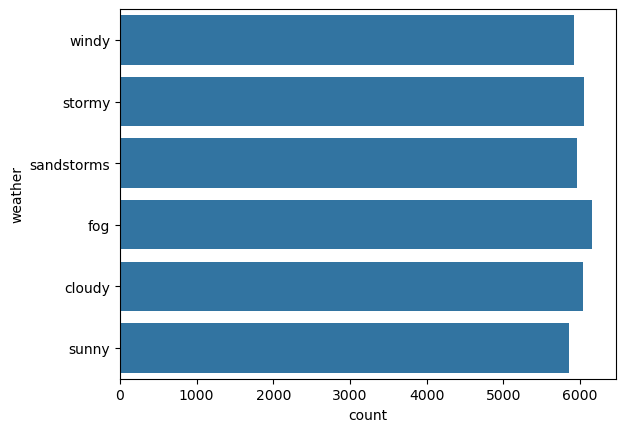

In [279]:
sns.countplot(xtrain["weather"])

In [280]:
# better to use a missing indicator with weather column imputed to represent missingness

from sklearn.impute import MissingIndicator

missing_weather = MissingIndicator()
missing_weather.set_output(transform="pandas")
pd.concat(
    [
        xtrain["weather"],
        missing_weather.fit_transform(xtrain["weather"].values.reshape(-1, 1)),
    ],
    axis=1,
)

,weather,missingindicator_x0
11047,windy,False
15692,windy,False
14499,stormy,False
29258,windy,False
22554,sandstorms,False
...,...,...
36378,NaN,False
36386,NaN,False
36387,NaN,False
36388,NaN,False


In [281]:
xtrain.head()

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,city_name,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
11047,26.0,4.7,windy,jam,2,snack,electric_scooter,1.0,no,metropolitian,MUM,3,wednesday,0,10.0,evening,9.177684,medium
15692,21.0,4.9,windy,medium,2,drinks,motorcycle,1.0,no,metropolitian,SUR,3,thursday,0,5.0,afternoon,6.081536,medium
14499,NaN,NaN,stormy,low,2,meal,scooter,1.0,no,metropolitian,MYS,3,saturday,1,NaN,NaN,1.554563,short
29258,32.0,4.7,windy,medium,0,buffet,motorcycle,1.0,no,metropolitian,JAP,4,monday,0,15.0,evening,20.852271,very_long
22554,34.0,4.9,sandstorms,jam,1,meal,scooter,0.0,no,urban,RANCHI,3,wednesday,0,5.0,night,9.056096,medium


In [282]:
xtrain.columns.tolist()

['age',
 'ratings',
 'weather',
 'traffic',
 'vehicle_condition',
 'type_of_order',
 'type_of_vehicle',
 'multiple_deliveries',
 'festival',
 'city_type',
 'city_name',
 'order_month',
 'order_day_of_week',
 'is_weekend',
 'pickup_time_minutes',
 'order_time_of_day',
 'distance',
 'distance_type']

weather is important feature so

cant drop and impute easily so

add a missing indicator along with imputation


## Traffic


In [283]:
xtrain["traffic"].value_counts()

traffic
low       12323
jam       11320
medium     8773
high       3578
Name: count, dtype: int64

similar uniform and large difference distribution

so cant easily impute thus apply missing indicator


<Axes: xlabel='count', ylabel='traffic'>

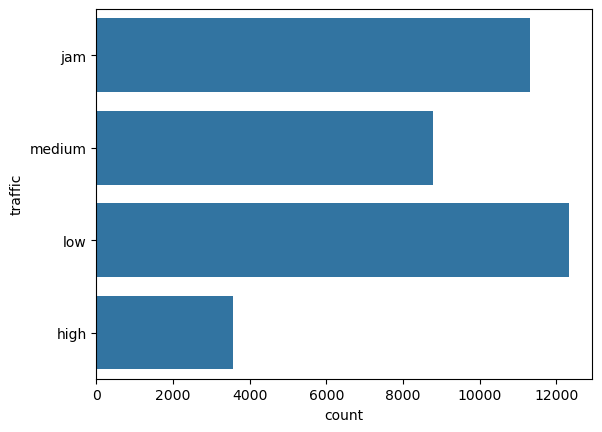

In [284]:
sns.countplot(xtrain.traffic)

## Multiple Delivery


In [285]:
xtrain["multiple_deliveries"].value_counts(dropna=False)

multiple_deliveries
1.0    22487
0.0    11252
2.0     1599
NaN      795
3.0      268
Name: count, dtype: int64

1 is the dominating category here

so can impute with 1


<Axes: xlabel='count', ylabel='multiple_deliveries'>

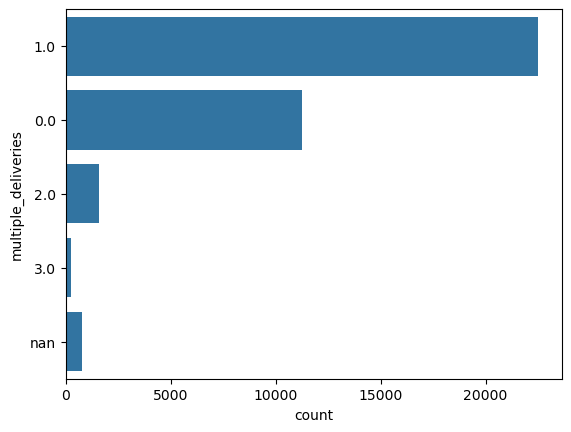

In [286]:
sns.countplot(xtrain["multiple_deliveries"].apply(str))

In [287]:
multi_delivery_mode = xtrain.multiple_deliveries.mode()[0]
multi_delivery_mode

1.0

<Axes: xlabel='count', ylabel='multiple_deliveries'>

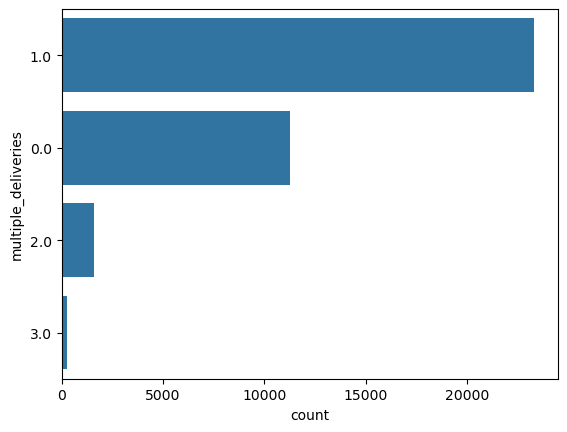

In [288]:
sns.countplot(xtrain["multiple_deliveries"].fillna(multi_delivery_mode).apply(str))

## Festival


In [289]:
xtrain["festival"].value_counts(dropna=False)

festival
no     35474
yes      739
NaN      188
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='festival'>

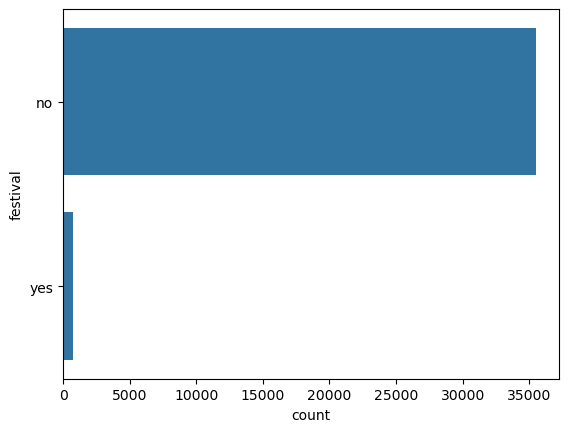

In [290]:
sns.countplot(xtrain["festival"])

<Axes: xlabel='count', ylabel='festival'>

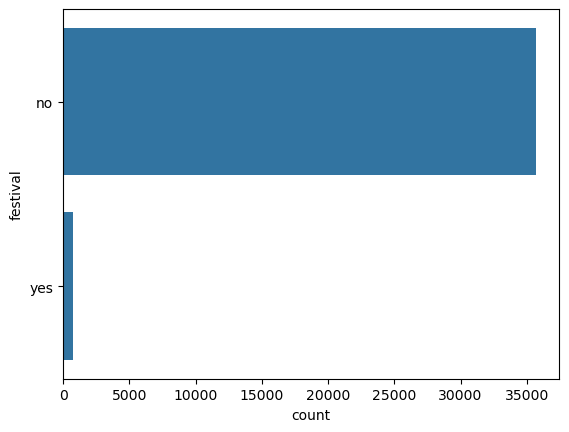

In [291]:
sns.countplot(xtrain["festival"].fillna(xtrain.festival.mode()[0]))

yes is clearly the dominating category so

impute mode


In [292]:
festival_mode = xtrain["festival"].mode()[0]
festival_mode

'no'

## City type


In [293]:
xtrain["city_type"].value_counts(dropna=False)

city_type
metropolitian    27245
urban             8058
NaN                968
semi-urban         130
Name: count, dtype: int64

In [294]:
city_type_mode = xtrain["city_type"].mode()[0]
city_type_mode

'metropolitian'

<Axes: xlabel='count', ylabel='city_type'>

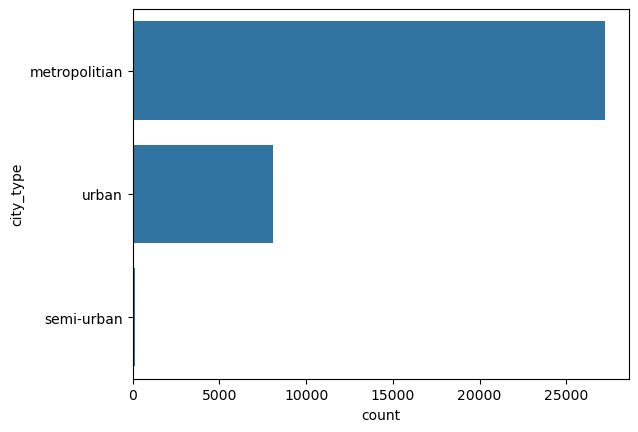

In [295]:
sns.countplot(xtrain.city_type)

In [296]:
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

## pickup time minutes


In [297]:
xtrain["pickup_time_minutes"].value_counts(dropna=False)

pickup_time_minutes
10.0    11704
5.0     11704
15.0    11695
NaN      1298
Name: count, dtype: int64

In [298]:
xtrain["pickup_time_minutes"].describe()

count    35103.000000
mean         9.998718
std          4.082279
min          5.000000
25%          5.000000
50%         10.000000
75%         15.000000
max         15.000000
Name: pickup_time_minutes, dtype: float64

In [299]:
pickup_time_median = xtrain["pickup_time_minutes"].median()
pickup_time_median

10.0

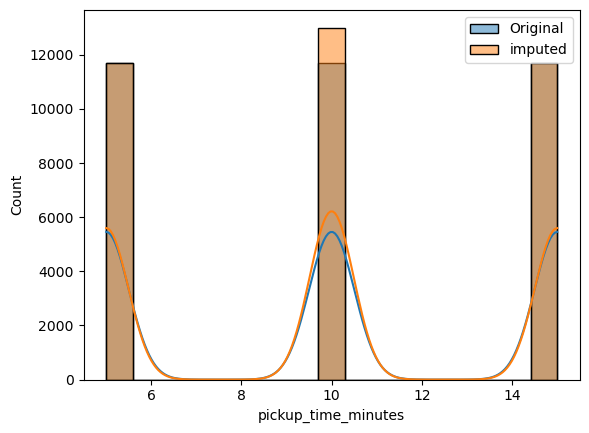

In [300]:
sns.histplot(xtrain["pickup_time_minutes"], kde=True, label="Original")
sns.histplot(
    xtrain["pickup_time_minutes"].fillna(pickup_time_median), kde=True, label="imputed"
)
plt.legend()

In [301]:
xtrain["order_time_of_day"].value_counts(dropna=False)

order_time_of_day
night             10994
evening           10906
morning            6883
afternoon          5972
NaN                1646
after_midnight        0
Name: count, dtype: int64

In [302]:
xtrain["order_time_of_day"].describe()

count     34755
unique        4
top       night
freq      10994
Name: order_time_of_day, dtype: object

<Axes: xlabel='count', ylabel='order_time_of_day'>

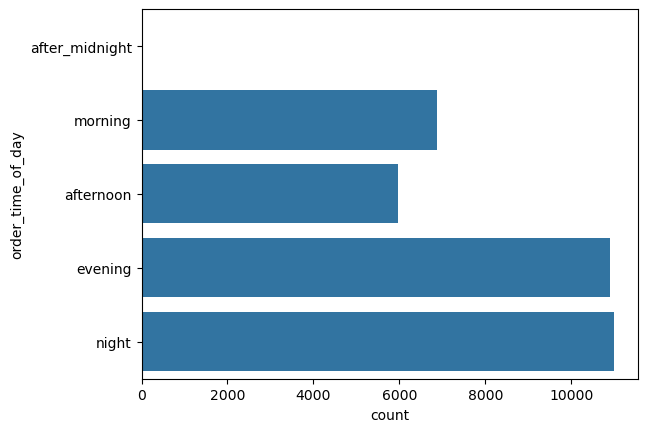

In [303]:
sns.countplot(xtrain["order_time_of_day"])

distrubution is sort of uniform and no extreme dominant category is present

and this column is important for prediction

so imputation should be done safely


In [304]:
xtrain[xtrain["order_time_of_day"].isna()]

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,city_name,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
14499,NaN,NaN,stormy,low,2,meal,scooter,1.0,no,metropolitian,MYS,3,saturday,1,NaN,NaN,1.554563,short
21954,20.0,2.8,sunny,low,2,drinks,scooter,1.0,no,metropolitian,JAP,3,wednesday,0,10.0,NaN,10.427236,long
35022,28.0,5.0,fog,low,2,snack,motorcycle,1.0,no,metropolitian,HYD,3,sunday,1,15.0,NaN,16.903757,very_long
8177,NaN,NaN,NaN,NaN,3,meal,scooter,1.0,no,metropolitian,KOL,2,wednesday,0,NaN,NaN,19.673431,very_long
23512,NaN,NaN,sunny,jam,0,buffet,motorcycle,1.0,no,metropolitian,COIMB,4,tuesday,0,NaN,NaN,4.674220,short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33896,NaN,NaN,NaN,NaN,3,drinks,electric_scooter,1.0,no,urban,GOA,2,monday,0,NaN,NaN,NaN,NaN
22443,NaN,NaN,sunny,low,0,snack,motorcycle,1.0,no,urban,INDO,3,monday,0,NaN,NaN,3.024981,short
21556,NaN,NaN,stormy,jam,1,meal,scooter,0.0,no,urban,MYS,4,saturday,1,NaN,NaN,17.097973,very_long
22040,25.0,5.0,sunny,low,1,meal,scooter,1.0,no,metropolitian,LUDH,2,tuesday,0,5.0,NaN,8.789430,medium


mnar


## Distance


In [305]:
xtrain["distance"].describe()

count    33470.000000
mean         9.738154
std          5.608401
min          1.465067
25%          4.657672
50%          9.193421
75%         13.681057
max         20.969489
Name: distance, dtype: float64

In [306]:
xtrain["distance"].isna().sum()

2931

<Axes: xlabel='distance', ylabel='Density'>

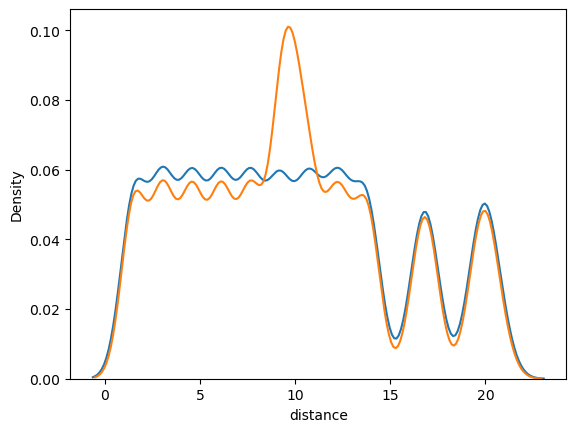

In [307]:
distance_mean = xtrain["distance"].mean()

sns.kdeplot(xtrain["distance"], label="original")
sns.kdeplot(xtrain["distance"].fillna(distance_mean), label="imputed")

<Axes: xlabel='distance', ylabel='Density'>

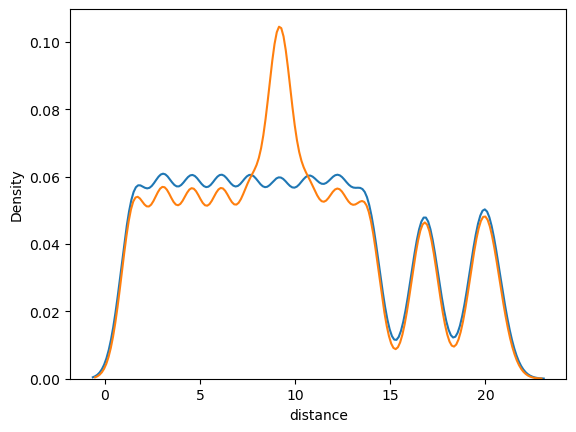

In [308]:
distance_mean = xtrain["distance"].mean()

sns.kdeplot(xtrain["distance"], label="original")
sns.kdeplot(xtrain["distance"].fillna(xtrain.distance.median()), label="imputed")

after imputation distribution changed ie peaked at median/mean

so other imputation are favoured


In [309]:
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

## Distance type


In [310]:
xtrain["distance_type"].value_counts(dropna=False)

distance_type
long         9025
short        8998
medium       8993
very_long    6454
NaN          2931
Name: count, dtype: int64

No dominant category


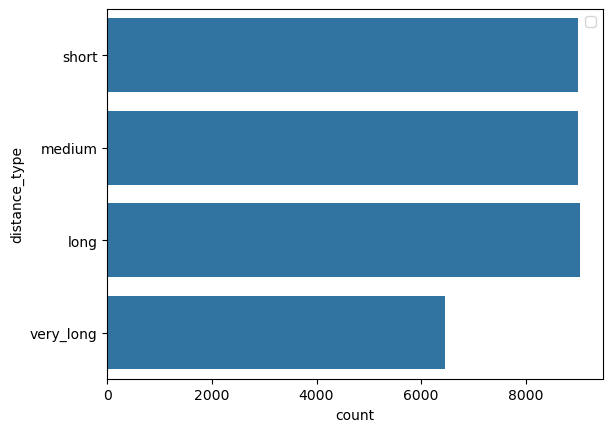

In [311]:
sns.countplot(xtrain["distance_type"])
plt.legend()

In [312]:
# due to uniform distribution mode cant be used

# Imputation Pipeline


In [313]:
nominal_cat_cols

['weather',
 'type_of_order',
 'type_of_vehicle',
 'festival',
 'city_type',
 'city_name',
 'order_month',
 'order_day_of_week',
 'order_time_of_day',
 'is_weekend']

In [314]:
xtrain.isna().sum()

age                    1470
ratings                1510
weather                 421
traffic                 407
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     795
festival                188
city_type               968
city_name                 0
order_month               0
order_day_of_week         0
is_weekend                0
pickup_time_minutes    1298
order_time_of_day      1646
distance               2931
distance_type          2931
dtype: int64

In [315]:
# fill with mode

feature_to_fill_with_mode = ["multiple_deliveries", "festival", "city_type"]
feature_to_fill_with_missing = [
    col for col in nominal_cat_cols if col not in feature_to_fill_with_mode
]
feature_to_fill_with_missing

['weather',
 'type_of_order',
 'type_of_vehicle',
 'city_name',
 'order_month',
 'order_day_of_week',
 'order_time_of_day',
 'is_weekend']

In [316]:
# simple imputer

simple_imputer = ColumnTransformer(
    transformers=[
        (
            "mode_imputer",
            SimpleImputer(strategy="most_frequent"),
            feature_to_fill_with_mode,
        ),
        (
            "missing_imputer",
            SimpleImputer(strategy="constant", fill_value="missing"),
            feature_to_fill_with_missing,
        ),
    ],
    remainder="passthrough",
    n_jobs=4,
    verbose_feature_names_out=False,
)
simple_imputer

ColumnTransformer(n_jobs=4, remainder='passthrough',
                  transformers=[('mode_imputer',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['multiple_deliveries', 'festival',
                                  'city_type']),
                                ('missing_imputer',
                                 SimpleImputer(fill_value='missing',
                                               strategy='constant'),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'city_name', 'order_month',
                                  'order_day_of_week', 'order_time_of_day',
                                  'is_weekend'])],
                  verbose_feature_names_out=False)

In [317]:
simple_imputer.fit_transform(xtrain)

,multiple_deliveries,festival,city_type,weather,type_of_order,type_of_vehicle,city_name,order_month,order_day_of_week,order_time_of_day,is_weekend,age,ratings,traffic,vehicle_condition,pickup_time_minutes,distance,distance_type
11047,1.0,no,metropolitian,windy,snack,electric_scooter,MUM,3,wednesday,evening,0,26.0,4.7,jam,2,10.0,9.177684,medium
15692,1.0,no,metropolitian,windy,drinks,motorcycle,SUR,3,thursday,afternoon,0,21.0,4.9,medium,2,5.0,6.081536,medium
14499,1.0,no,metropolitian,stormy,meal,scooter,MYS,3,saturday,missing,1,NaN,NaN,low,2,NaN,1.554563,short
29258,1.0,no,metropolitian,windy,buffet,motorcycle,JAP,4,monday,evening,0,32.0,4.7,medium,0,15.0,20.852271,very_long
22554,0.0,no,urban,sandstorms,meal,scooter,RANCHI,3,wednesday,night,0,34.0,4.9,jam,1,5.0,9.056096,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11303,0.0,no,metropolitian,sandstorms,meal,scooter,COIMB,4,monday,evening,0,29.0,4.7,jam,2,5.0,12.464367,long
44821,0.0,no,urban,cloudy,buffet,motorcycle,SUR,3,wednesday,morning,0,36.0,4.8,low,0,10.0,1.520432,short
38234,0.0,no,metropolitian,fog,buffet,scooter,BHP,2,thursday,evening,0,36.0,4.4,jam,1,10.0,NaN,NaN
860,1.0,no,metropolitian,windy,meal,scooter,CHEN,3,saturday,afternoon,1,25.0,4.9,medium,2,5.0,7.760938,medium


In [318]:
simple_imputer.fit_transform(xtrain).isna().sum()

multiple_deliveries       0
festival                  0
city_type                 0
weather                   0
type_of_order             0
type_of_vehicle           0
city_name                 0
order_month               0
order_day_of_week         0
order_time_of_day         0
is_weekend                0
age                    1470
ratings                1510
traffic                 407
vehicle_condition         0
pickup_time_minutes    1298
distance               2931
distance_type          2931
dtype: int64

In [319]:
xtrain.isna().sum()

age                    1470
ratings                1510
weather                 421
traffic                 407
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     795
festival                188
city_type               968
city_name                 0
order_month               0
order_day_of_week         0
is_weekend                0
pickup_time_minutes    1298
order_time_of_day      1646
distance               2931
distance_type          2931
dtype: int64

## Knn imputer


In [ ]:
knn = KNNImputer(n_neighbors=5)

In [321]:
num_cols, nominal_cat_cols, ordinal_cat_cols

(['age', 'ratings', 'pickup_time_minutes', 'distance'],
 ['weather',
  'type_of_order',
  'type_of_vehicle',
  'festival',
  'city_type',
  'city_name',
  'order_month',
  'order_day_of_week',
  'order_time_of_day',
  'is_weekend'],
 ['traffic', 'distance_type'])

In [322]:
traffic_order, distance_order

(['low', 'medium', 'high', 'jam'], ['short', 'medium', 'long', 'very_long'])

In [323]:
processor = ColumnTransformer(
    transformers=[
        (
            "nominal_encode",
            OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False),
            nominal_cat_cols,
        ),
        (
            "ordinal_encoder",
            OrdinalEncoder(
                categories=[traffic_order, distance_order],
                encoded_missing_value=-999,
                handle_unknown="use_encoded_value",
                unknown_value=-1,
            ),
            ordinal_cat_cols,
        ),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,
    n_jobs=-3,
)
processor

ColumnTransformer(n_jobs=-3, remainder='passthrough',
                  transformers=[('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'city_name',
                                  'order_month', 'order_day_of_week',
                                  'order_time_of_day', 'is_weekend']),
                                ('ordinal_encoder',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']],
                                                encoded_missing_value=-999,
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [324]:
processor.fit_transform(xtrain)

,weather_fog,weather_sandstorms,weather_stormy,weather_sunny,weather_windy,weather_nan,type_of_order_drinks,type_of_order_meal,type_of_order_snack,type_of_vehicle_electric_scooter,...,order_time_of_day_nan,is_weekend_1,traffic,distance_type,age,ratings,vehicle_condition,multiple_deliveries,pickup_time_minutes,distance
11047,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,3.0,1.0,26.0,4.7,2,1.0,10.0,9.177684
15692,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,21.0,4.9,2,1.0,5.0,6.081536
14499,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,NaN,NaN,2,1.0,NaN,1.554563
29258,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3.0,32.0,4.7,0,1.0,15.0,20.852271
22554,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,3.0,1.0,34.0,4.9,1,0.0,5.0,9.056096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11303,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,3.0,2.0,29.0,4.7,2,0.0,5.0,12.464367
44821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,36.0,4.8,0,0.0,10.0,1.520432
38234,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,-1.0,36.0,4.4,1,0.0,10.0,NaN
860,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,25.0,4.9,2,1.0,5.0,7.760938


In [325]:
processor.fit_transform(xtrain).isna().sum().loc[lambda ser: ser.ge(1)]

age                    1470
ratings                1510
multiple_deliveries     795
pickup_time_minutes    1298
distance               2931
dtype: int64

In [326]:
preprocessing_pipeline = Pipeline(
    steps=[
        ("simple_imputer", simple_imputer),
        ("preprocess", processor),
        ("knn_imputer", knn),
    ]
)

preprocessing_pipeline

Pipeline(steps=[('simple_imputer',
                 ColumnTransformer(n_jobs=4, remainder='passthrough',
                                   transformers=[('mode_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['multiple_deliveries',
                                                   'festival', 'city_type']),
                                                 ('missing_imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant'),
                                                  ['weather', 'type_of_order',
                                                   'type_of_vehicle',
                                                   'city_name', 'order_month',
                                                   '...
                                                   'city_name', 'order_month',
                                                   'order_day_of_week',
                                                   'order_time_of_day',
                                                   'is_weekend']),
                                                 ('ordinal_encoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high',
                                                                              'jam'],
                                                                             ['short',
                                                                              'medium',
                                                                              'long',
                                                                              'very_long']],
                                                                 encoded_missing_value=-999,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['traffic',
                                                   'distance_type'])],
                                   verbose_feature_names_out=False)),
                ('knn_imputer', KNNImputer())])

In [327]:
preprocessing_pipeline.fit_transform(xtrain)

,weather_fog,weather_missing,weather_sandstorms,weather_stormy,weather_sunny,weather_windy,type_of_order_drinks,type_of_order_meal,type_of_order_snack,type_of_vehicle_electric_scooter,...,order_time_of_day_night,is_weekend_1,traffic,distance_type,multiple_deliveries,age,ratings,vehicle_condition,pickup_time_minutes,distance
11047,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,3.0,1.0,1.0,26.0,4.70,2.0,10.0,9.177684
15692,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,21.0,4.90,2.0,5.0,6.081536
14499,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,31.2,4.66,2.0,8.0,1.554563
29258,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3.0,1.0,32.0,4.70,0.0,15.0,20.852271
22554,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,3.0,1.0,0.0,34.0,4.90,1.0,5.0,9.056096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11303,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,3.0,2.0,0.0,29.0,4.70,2.0,5.0,12.464367
44821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,36.0,4.80,0.0,10.0,1.520432
38234,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,-1.0,0.0,36.0,4.40,1.0,10.0,4.508633
860,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,25.0,4.90,2.0,5.0,7.760938


In [328]:
lr = LinearRegression()
model_pipe = Pipeline(steps=[("preprocessing", preprocessing_pipeline), ("model", lr)])
model_pipe

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(n_jobs=4,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['weather',
                                                                    'type_of_order',
                                                                    'type_of_veh...
                                                                    'order_time_of_day',
                                                                    'is_weekend']),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', LinearRegression())])

In [ ]:
model_pipe.fit(xtrain, y_train_transformed)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(n_jobs=4,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['weather',
                                                                    'type_of_order',
                                                                    'type_of_veh...
                                                                    'order_time_of_day',
                                                                    'is_weekend']),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', LinearRegression())])

In [ ]:
ytrain_pred = model_pipe.predict(xtrain)
ytest_pred = model_pipe.predict(xtest)

In [331]:
ytrain_pred = pt.inverse_transform(ytrain_pred.reshape(-1, 1))
ytest_pred = pt.inverse_transform(ytest_pred.reshape(-1, 1))
print("MAE: Train error: ", mean_absolute_error(ytrain, ytrain_pred))
print("MAE: Test error: ", mean_absolute_error(ytest, ytest_pred))
print("r2: Train score: ", r2_score(ytrain, ytrain_pred))
print("r2: Test score: ", r2_score(ytest, ytest_pred))

MAE: Train error:  4.831920684734905
MAE: Test error:  4.858546330930327
r2: Train score:  0.5795074088255723
r2: Test score:  0.5751030486126866


In [ ]:
rf = RandomForestRegressor()

In [333]:
model_pipe = Pipeline(steps=[("preprocessing", preprocessing_pipeline), ("model", rf)])
model_pipe

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(n_jobs=4,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['weather',
                                                                    'type_of_order',
                                                                    'type_of_veh...
                                                                    'order_time_of_day',
                                                                    'is_weekend']),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', RandomForestRegressor())])

In [ ]:
model_pipe.fit(xtrain, y_train_transformed)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(n_jobs=4,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['weather',
                                                                    'type_of_order',
                                                                    'type_of_veh...
                                                                    'order_time_of_day',
                                                                    'is_weekend']),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', RandomForestRegressor())])

In [ ]:
ytrain_pred = model_pipe.predict(xtrain)
ytest_pred = model_pipe.predict(xtest)

In [336]:
ytrain_pred = pt.inverse_transform(ytrain_pred.reshape(-1, 1))
ytest_pred = pt.inverse_transform(ytest_pred.reshape(-1, 1))
print("MAE: Train error: ", mean_absolute_error(ytrain, ytrain_pred))
print("MAE: Test error: ", mean_absolute_error(ytest, ytest_pred))
print("r2: Train score: ", r2_score(ytrain, ytrain_pred))
print("r2: Test score: ", r2_score(ytest, ytest_pred))

MAE: Train error:  1.217334572201501
MAE: Test error:  3.2937125646332626
r2: Train score:  0.9715427814491487
r2: Test score:  0.7998141561466703


In [338]:
# overfitting problem is observed --- needs examination in next step